"Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators." - Udacity 2019, Data Analyst Nanodegree Course, Project 2

## Selected Datasets

From the datasets on [Gapminder](https://www.gapminder.org/data/) I selected various interesting CSV files from the file chooser application on the bottom of the page. I want to indicate here that those are the newer datasets, as this indication is one of the requirements stated in the project description of Udacity. Let me give you a quick overview over the selected files (I renamed the original files from Gapminder to better describe their content and the short descriptions come from Gapminder itself):

population_total.csv : Total Population (data after 2010 is based on the medium estimates from UN population division). The dataset even contains projections for the future. This data will be cut off in this project as for all of the other datasets no values for future years are available.

population_density.csv : Population density (people per sq. km of land area)

life_expectancy_years.csv : Life expectancy (years) - average number of years a newborn child would live if current mortality patterns were to stay the same

income_per_capita.csv : Income per person (GDP/capita, PPP$ inflation-adjusted)

educational_attainment.csv : Educational attainment, at least completed primary school, population 25+ years total (%)

tuberculosis_incd.csv : Incidence to suffer a tuberculosis disease

hiv_incd.csv : Incidence to suffer a hiv disease

## Intention

What I want to do is exploring the trends for different countries in these datasets for the three main indicators: Health, Economy/Education, Population. For each of these three main indicators I have corresponding datasets to look at. With the datasets for the hiv and tuberculosis incidence and the life expectancy I want to analyze the health trend in each country. Total population and the population density dataset will help me to make statements about the population itself. Finally the income per capita and the educational attainment will hopefully tell me the trend about the economy/education indicator. This leads me to the questions in the next section.

## Questions

I will group my questions into the following groups:
H - Health
E - Economy / Education
P - Population

P: How did the total population and corresponding the population density evolve over the past 50 years?
P: Which 10 countries are amongst the most evolving countries from 1970-2019?

H: How did the hiv and tuberculosis incidence evolve in the past 50 years looking at the 10 worst-performing countries?
H: Analyzing the life expectancy for above 10 countries: Is this trend visible?

E: How did the income and educational attainment evolve in the past 50 years looking at the 10 worst-performing countries?

Are there trends that can be observed between the selected metrics?

## Data Wrangling

My goal is to fit the data into a very specific form (Country, Year, Population, PopulationDensity, HIV, Tuberculosis, LifeExpectancy, Income, Education). Therefore I need to merge each of my CSV files into this new structure. This structure allows me in a further stage to efficiently analyze the data and hopefully answer my questions.

First lets import some libraries. I choose pandas (wrangling / computation), numpy (computation), matplotlib (visualization) and seaborn (visualizsation).

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

Next i want to import my datasets that I previously downloaded as CSV files from Gapminder.io.

In [116]:
df_pop = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\population_total.csv")
df_pop_dens = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\population_density.csv")
df_tub = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\tuberculosis_incd.csv")
df_hiv = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\hiv_incd.csv")
df_exp = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\life_expectancy_years.csv")
df_inc = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\income_per_capita.csv")
df_edu = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project2\\educational_attainment.csv")

Next I need to see on how easy it will be to merge the datasets together:

In [117]:
print("Population: " + str(df_pop.shape) + 
      " \nPopulation Density: " + str(df_pop_dens.shape) + 
      " \nTuberculosis Incidence: " + str(df_tub.shape) + 
      " \nHIV incidence: " + str(df_hiv.shape) + 
      " \nLife Expectancy: " + str(df_exp.shape) + 
      " \nIncome: " + str(df_inc.shape) + 
      " \nEducation: " + str(df_edu.shape))

Population: (195, 1016) 
Population Density: (192, 58) 
Tuberculosis Incidence: (192, 18) 
HIV incidence: (128, 29) 
Life Expectancy: (187, 220) 
Income: (193, 242) 
Education: (146, 48)


It is already clear, that there will be many missing values after merging all the datasets together. In a next step I want to assign names to the datasets and add them to a list. I will use these names later on.

In [118]:
df_pop.name = 'pop'
df_pop_dens.name = 'pop_dens'
df_tub.name = 'tub_incd'
df_hiv.name = 'hiv_incd'
df_exp.name = 'life_exp'
df_inc.name = 'inc'
df_edu.name = 'edu'
list_of_datasets = [df_pop,df_pop_dens,df_tub,df_hiv,df_exp,df_inc,df_edu]

Next i want to define two functions because I do not want redundant code for all of the 7 datasets. The function dropTheseColumns will take a dataframe as input, drop all columns from years not between 1970 and 2019 and then return the edited dataframe. The function transposeFrame takes a dataframe as input and kind of transpose the dataframe. It outputs the dataframe in the format (country,year,name_of_dataframe).

In [119]:
# this function drops all columns from years not between 1970 and 2019
def dropTheseColumns(df_input):
    # iterate through columns
    for column in df_input:
        # skip column 'country' to avoid TypeErrors
        if str(column)!='country': 
            # drop columns lower or equal 1970
            if(int(column)<=1970): df_input.drop(column, axis=1, inplace=True)
            # drop columns 2020 or higher
            if(int(column)>2019) : df_input.drop(column, axis=1, inplace=True)
    return df_input

In [120]:
# this function transposes the dataset to (country,year,indicator_value)
def transposeFrame(df_input):
    # set up the output dataframe
    df_output = pd.DataFrame(columns=['country','year',str(df_input.name)])
    # iterate through all rows and columns of input dataframe
    for index, row in df_input.iterrows():
        for column in df_input:
            # skip the column 'country'
            if str(column)!='country':
                # append transposed rows to output dataframe
                s = pd.Series([row['country'],column,row[column]],
                              index=['country','year',str(df_input.name)])
                df_output = df_output.append(s, ignore_index=True)
    return df_output

Now lets loop through all 7 dataframes and execute the functions on them. This will run for some seconds.

In [121]:
for index, dataset in enumerate(list_of_datasets):
    # drop unwanted columns
    dataset = dropTheseColumns(dataset)
    # transpose data frame
    dataset = transposeFrame(dataset)
    # remove duplicates
    dataset.drop_duplicates(keep=False,inplace=True)
    # reassign dataset to list
    list_of_datasets[index] = dataset

Now that we have every of the single dataframes in the correct structure we are ready to merge them together based on the values in the country and year column.

In [122]:
# merge all of the transposes dataframes together
df_country_ind = pd.merge(list_of_datasets[0],list_of_datasets[1],
                          on=['country','year'],how='left')
df_country_ind = pd.merge(df_country_ind,list_of_datasets[2],
                          on=['country','year'],how='left')
df_country_ind = pd.merge(df_country_ind,list_of_datasets[3],
                          on=['country','year'],how='left')
df_country_ind = pd.merge(df_country_ind,list_of_datasets[4],
                          on=['country','year'],how='left')
df_country_ind = pd.merge(df_country_ind,list_of_datasets[5],
                          on=['country','year'],how='left')
df_country_ind = pd.merge(df_country_ind,list_of_datasets[6],
                          on=['country','year'],how='left')

Checking the output:

In [123]:
df_country_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555 entries, 0 to 9554
Data columns (total 9 columns):
country     9555 non-null object
year        9555 non-null object
pop         8385 non-null object
pop_dens    8837 non-null float64
tub_incd    3241 non-null float64
hiv_incd    3557 non-null float64
life_exp    8970 non-null float64
inc         9457 non-null object
edu         698 non-null float64
dtypes: float64(5), object(4)
memory usage: 746.5+ KB


There are many nan values for some columns. I can't do much about those who are just missing because there are no numbers available for early years. But I can do an interpolation of the missing values in between two known values. For this project I will go with a linear interpolation.

Let us first transform the columns inc and pop to float.

In [124]:
# change column datatypes for population and income column
df_country_ind['pop']=df_country_ind['pop'].astype('float64')
df_country_ind['inc']=df_country_ind['inc'].astype('float64')

Now the interpolation:

In [125]:
df_country_ind = df_country_ind.groupby('country').apply(lambda group: 
                        group.interpolate(method='linear'))

Great, now let's check again:

In [126]:
df_country_ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555 entries, 0 to 9554
Data columns (total 9 columns):
country     9555 non-null object
year        9555 non-null object
pop         9555 non-null float64
pop_dens    9230 non-null float64
tub_incd    3817 non-null float64
hiv_incd    3813 non-null float64
life_exp    9163 non-null float64
inc         9457 non-null float64
edu         3655 non-null float64
dtypes: float64(7), object(2)
memory usage: 746.5+ KB


## Answering the questions

### Population Questions

Next we want to add a olumn for each indicator holding the change in percentage.

In [127]:
# add a percentage change column for each of the indicators
# it is important to group by country here, otherwise the percentage changes
# of different countries get calculated together
df_country_ind['pop_pct'] = df_country_ind.groupby('country').pop.pct_change()
df_country_ind['pop_dens_pct'] = df_country_ind.groupby('country').pop_dens.pct_change()
df_country_ind['tub_incd_pct'] = df_country_ind.groupby('country').tub_incd.pct_change()
df_country_ind['hiv_incd_pct'] = df_country_ind.groupby('country').hiv_incd.pct_change()
df_country_ind['life_exp_pct'] = df_country_ind.groupby('country').life_exp.pct_change()
df_country_ind['inc_pct'] = df_country_ind.groupby('country').inc.pct_change()
df_country_ind['edu_pct'] = df_country_ind.groupby('country').edu.pct_change()

In [128]:
# set up an aggregated dataframe containing the mean values for every country
df_aggregated = df_country_ind.groupby('country').mean()
# replace infinite values by nan
df_aggregated = df_aggregated.replace([np.inf, -np.inf], np.nan)

Sorting the percentage change for the total population descending gives us the 10 fastest growing countries.

In [129]:
df_pop_pct_sorted = df_aggregated.sort_values(by='pop_pct', 
            ascending=False).head(10)['pop_pct'].to_frame().reset_index()
df_pop_pct_sorted

,country,pop_pct
0,Honduras,122.450759
1,India,34.850080
2,Nepal,23.939521
3,Uganda,20.085180
4,Argentina,5.438635
5,Sudan,2.267581
6,Lithuania,1.733531
7,Dominican Republic,1.394758
8,Angola,1.393933
9,Palestine,1.120757


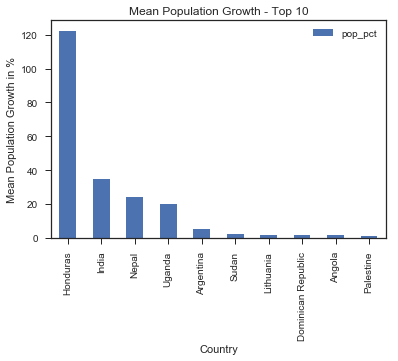

In [130]:
df_pop_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_pop_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Population Growth in %")
plt.title('Mean Population Growth - Top 10')
plt.show()

The top three countries are Honduras with a remarkable growth, India and Nepal. Also Uganda was growing very fast in the last 50 years. Doing the same with the population density is showing a different result:

In [131]:
df_pop_dens_pct_sorted = df_aggregated.sort_values(by='pop_dens_pct', 
            ascending=False).head(10)['pop_dens_pct'].to_frame().reset_index()
df_pop_dens_pct_sorted

,country,pop_dens_pct
0,Nauru,2.187828
1,Mauritius,1.952733
2,Monaco,1.948052
3,Malta,1.258510
4,India,1.137819
5,Haiti,0.895629
6,Liechtenstein,0.757724
7,Singapore,0.610943
8,Austria,0.562037
9,Tuvalu,0.396294


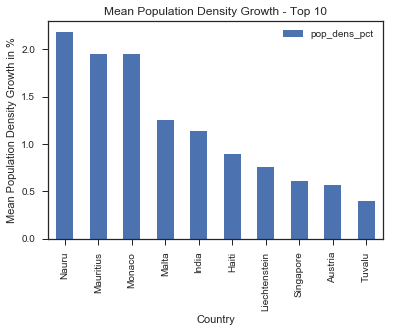

In [132]:
df_pop_dens_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_pop_dens_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Population Density Growth in %")
plt.title('Mean Population Density Growth - Top 10')
plt.show()

Only india of the top 10 countries in total population growth is also present in the top 10 population density growth. This answered my two questions in the group "Population".

### Health Questions

Sorting the percentage change for the hiv and tuberculosis incidence descending gives us the 10 worst performing countries. First the hiv incidence.

In [133]:
df_hiv_incd_pct_sorted = df_aggregated.sort_values(by='hiv_incd_pct', 
            ascending=False).head(10)['hiv_incd_pct'].to_frame().reset_index()
df_hiv_incd_pct_sorted

,country,hiv_incd_pct
0,Lesotho,6.658068
1,South Africa,3.234318
2,Mozambique,2.204907
3,Cameroon,1.268284
4,Malawi,1.176644
5,Kenya,1.061193
6,Nigeria,0.881641
7,Namibia,0.874021
8,Central African Republic,0.805424
9,Tanzania,0.789540


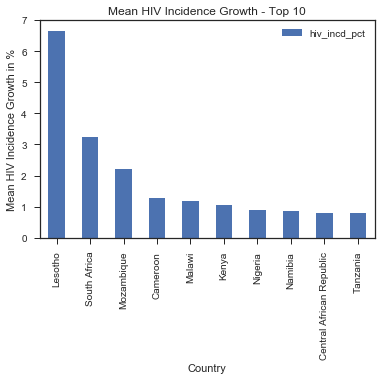

In [134]:
df_hiv_incd_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_hiv_incd_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean HIV Incidence Growth in %")
plt.title('Mean HIV Incidence Growth - Top 10')
plt.show()

It is not very surprising that there are many countries from Africa in the top 10. Lets check if the same is the case for the tuberculosis incidence.

In [135]:
df_tub_incd_pct_sorted = df_aggregated.sort_values(by='tub_incd_pct', 
            ascending=False).head(10)['tub_incd_pct'].to_frame().reset_index()
df_tub_incd_pct_sorted

,country,tub_incd_pct
0,India,2.032202
1,Lesotho,1.810011
2,Belarus,1.367611
3,Gabon,1.301957
4,Angola,1.238485
5,Djibouti,1.106966
6,Panama,1.104720
7,Marshall Islands,0.670395
8,Pakistan,0.604846
9,Cape Verde,0.517427


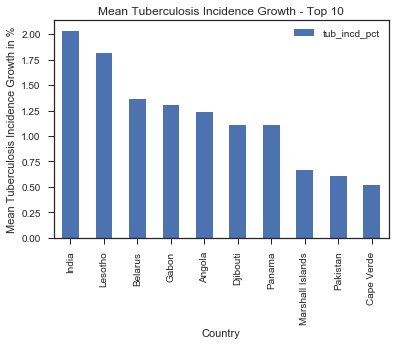

In [136]:
df_tub_incd_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_tub_incd_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Tuberculosis Incidence Growth in %")
plt.title('Mean Tuberculosis Incidence Growth - Top 10')
plt.show()

The tuberculosis data shows surprisingly that India is amongst the top 10 worst performing countries. Maybe this is due to the fact that it was also one of the fastest growing countries of the last 50 years as tuberculosis is an infectious disease. Let us check if these trends are visible in the life expectancy.

In [137]:
df_life_exp_sorted = df_aggregated.sort_values(by='life_exp', 
            ascending=True).head(10)['life_exp'].to_frame().reset_index()
df_life_exp_sorted

,country,life_exp
0,Central African Republic,47.867347
1,Malawi,49.744898
2,Burundi,49.928571
3,Afghanistan,50.534694
4,Niger,50.824490
5,Guinea-Bissau,50.828571
6,Sierra Leone,51.397959
7,Mali,51.716327
8,Mozambique,51.797959
9,Ethiopia,51.924490


The lowest life expectancies show three members that have also a very high hiv incidence (Malawi,Ethiopia,Mozambique).

### Economy / Education Questions

Looking at the worst income percentage changes shows us, that for some countries the income was even decreasing over the past 50 years.

In [138]:
df_inc_pct_sorted = df_aggregated.sort_values(by='inc_pct', 
            ascending=True).head(10)['inc_pct'].to_frame().reset_index()
df_inc_pct_sorted

,country,inc_pct
0,Madagascar,-0.026845
1,Central African Republic,-0.025710
2,Djibouti,-0.022052
3,Niger,-0.020655
4,Somalia,-0.019246
5,South Sudan,-0.018266
6,Comoros,-0.018042
7,Haiti,-0.017915
8,North Korea,-0.017254
9,Gambia,-0.017196


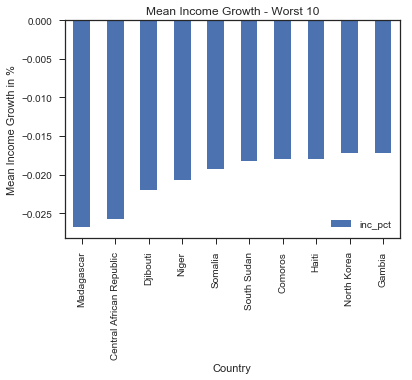

In [139]:
df_inc_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_inc_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Income Growth in %")
plt.title('Mean Income Growth - Worst 10')
plt.show()

Also the educational attainment percentage changes were decreasing for the worst performing countries.

In [140]:
df_edu_pct_sorted = df_aggregated.sort_values(by='edu_pct', 
            ascending=True).head(10)['edu_pct'].to_frame().reset_index()
df_edu_pct_sorted

,country,edu_pct
0,Botswana,-0.019080
1,Central African Republic,-0.016437
2,Cape Verde,-0.015664
3,Liberia,-0.015269
4,Kenya,-0.014836
5,Maldives,-0.014704
6,Vanuatu,-0.014592
7,Haiti,-0.012756
8,"Congo, Rep.",-0.011359
9,Ghana,-0.009541


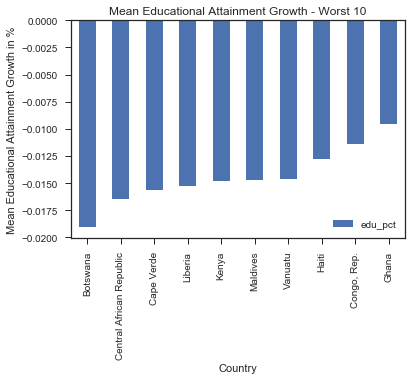

In [141]:
df_edu_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_edu_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Educational Attainment Growth in %")
plt.title('Mean Educational Attainment Growth - Worst 10')
plt.show()

### Trends between selected metrics

To observe any trends between the selected metrics I choose to draw a seaborn pairplot. The pairplot plots every metric against any other and shows possible correlations. To do this I need to first setup a new dataframe containing only the percentage changes columns and containing no row with a naN value in it. These would break the pairplot function. I will name this new dataset "df_country_ind_pct".

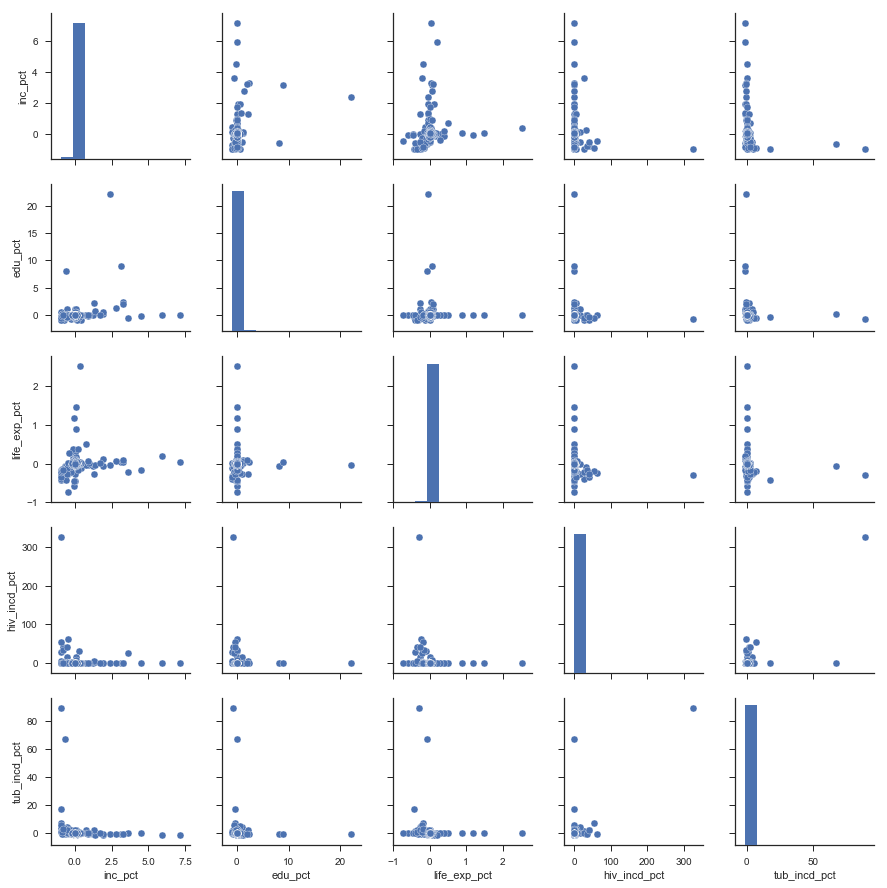

In [142]:
sns.set(style="ticks")
# select the important columns
df_country_ind_pct = df_country_ind[['country','inc_pct','edu_pct',
                                     'life_exp_pct','hiv_incd_pct',
                                     'tub_incd_pct']]
# selecting only rows that do not contain naN values in any of the columns
df_country_ind_pct= df_country_ind_pct[np.isfinite(df_country_ind_pct['inc_pct'])]
df_country_ind_pct= df_country_ind_pct[np.isfinite(df_country_ind_pct['edu_pct'])]
df_country_ind_pct= df_country_ind_pct[np.isfinite(df_country_ind_pct['life_exp_pct'])]
df_country_ind_pct= df_country_ind_pct[np.isfinite(df_country_ind_pct['hiv_incd_pct'])]
df_country_ind_pct= df_country_ind_pct[np.isfinite(df_country_ind_pct['tub_incd_pct'])]

# pairplot the dataframe
sns.pairplot(df_country_ind_pct)

The only possible correlations seem to be for income, life expectancy and education. However those plots contain many outliers and also the correlation seems not to strong. It would need a deeper statistical analysis to confirm on those possible correlations.

## Discussion

### Conclusions

One of the major conclusions is that India might have a very promising population growth and economy but they also seem to suffer increasing hiv and tuberculosis incidences. It would be interesting to include more of the health parameters and see if there are other correlations to be seen. Another conclusion is that Africa is very poor-performing in all of the selected metrics except the total population. Unfortunately I did not include any infrastructural metrics in my study. Thanks to the scatter plot and all the bar charts I was able to efficiently visualize the Top / worst 10 countries for the selected metrics. 

### Limitations

The datasets were sometimes incomplete especially for some countries in early years. Thanks to the interpolation function I was at least able to fill in the gaps between two known values. This linear interpolation should not have a big influence on the figures about the mean values grouped by country. To be able to communicate more findings it would need a deeper statistical analysis to confirm on the correlations between the selected metrics. This analysis here already shows that there could be some major correlations especially in the african countries. The missing educational attainment, income seems to drastically influence the incidences for deadly diseases like hiv and tuberculosis. This might then also decrease the life expectancy in those countries.